In [1]:
import random, time, os, sys, json
from tqdm import tqdm

In [2]:
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [6]:
mlp_dims_scale = {
    32: [2, 4, 8],
    4: [4, 8, 16],
    2: [4, 8, 16],
}
pwlf_grid_size = [3, 5, 9]

SEEDS = [147, 258, 369]
EPOCHS = 50

bench_dict = {}
def load_json(model_name):
#     data = {}
    with open(f'./models_bkp0/stats/{model_name}_stats.json') as f:
        data = json.load(f)
    bench_dict[model_name] = data
    return

def load_benchmark_fmnist():
    for seed in SEEDS:
        ## First test MLP with allowed dimension mixing
        for dim, hid_dim in mlp_dims_scale.items(): ## For 1024 these are the factors
            for hr in hid_dim:
                model_name = f"fmnist_BlockMLP_b{dim}_h{hr}_s{seed}"
                load_json(model_name)

            model_name = f"fmnist_SparseMLP_b{dim}_s{seed}"
            load_json(model_name)
            
        
        for gsz in pwlf_grid_size:
            model_name = f"fmnist_PairPWLF_g{gsz}_s{seed}"
            load_json(model_name)
        
        model_name = f"fmnist_OrdinaryMLP_s{seed}"
        load_json(model_name)

In [7]:
load_benchmark_fmnist()

In [8]:
bench_dict

{'fmnist_BlockMLP_b32_h2_s147': {'num_param': 280586,
  'latency': {'mean': 0.0003757254362106323, 'std': 2.833067792853994e-05},
  'train_acc': [81.33333333333333,
   86.70666666666666,
   88.23333333333333,
   89.30166666666666,
   90.08666666666667,
   90.48333333333333,
   91.15333333333334,
   91.72,
   92.12166666666667,
   92.58,
   92.95666666666666,
   93.29833333333333,
   93.67333333333333,
   94.015,
   94.415,
   94.615,
   94.95833333333333,
   95.28166666666667,
   95.40833333333333,
   95.625,
   95.91833333333334,
   96.11833333333334,
   96.30666666666667,
   96.49,
   96.585,
   96.82,
   96.915,
   97.11833333333334,
   97.19833333333334,
   97.32833333333333,
   97.54833333333333,
   97.64333333333333,
   97.69833333333334,
   97.75333333333333,
   97.77833333333334,
   97.84166666666667,
   97.955,
   98.01833333333333,
   98.04833333333333,
   98.13666666666667,
   98.17333333333333,
   98.185,
   98.19166666666666,
   98.26333333333334,
   98.26,
   98.286666666

## Plot training curve

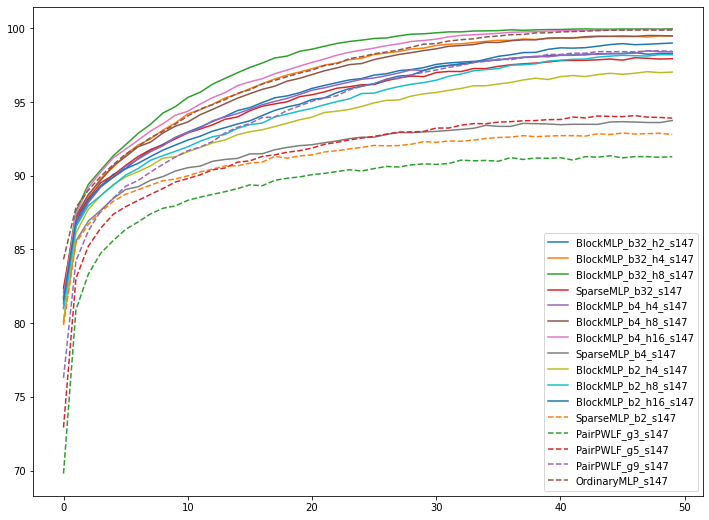

In [9]:
plt.figure(figsize=(12, 9))
for i, (model_name, stat) in enumerate(bench_dict.items()):
    start = 0
    stop = 16
    if (i < start or i >= stop) : continue
    if stat["train_acc"][-1] > 20: ## fmnist_PairPWLF_g9_s369
        if i > 10:
            linestyle='dashed'
        else:
            linestyle = None
        plt.plot(stat["train_acc"], label=model_name[7:], linestyle=linestyle)
plt.legend()

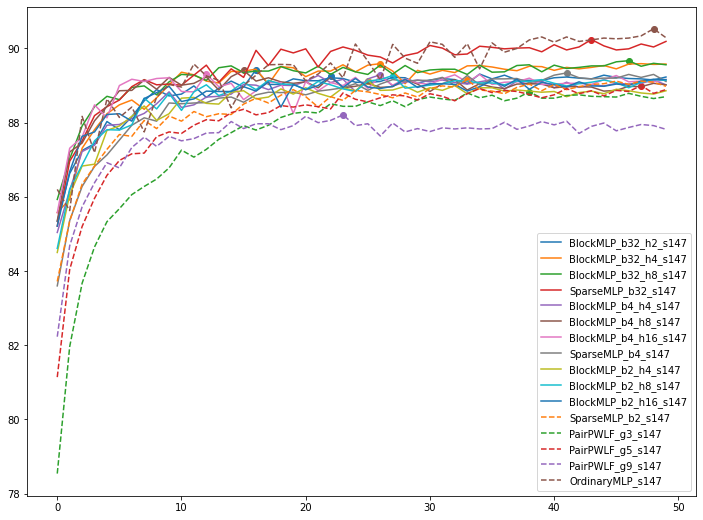

In [10]:
plt.figure(figsize=(12, 9))
for i, (model_name, stat) in enumerate(bench_dict.items()):
    start = 0
    stop = 16
    if (i < start or i >= stop) : continue
    if stat["test_acc"][-1] > 20: ## fmnist_PairPWLF_g9_s369
        if i > 10:
            linestyle='dashed'
        else:
            linestyle = None
        acc = stat["test_acc"]
        plt.plot(acc, label=model_name[7:], linestyle=linestyle)
        plt.scatter(np.argmax(acc), np.max(acc))
plt.legend()

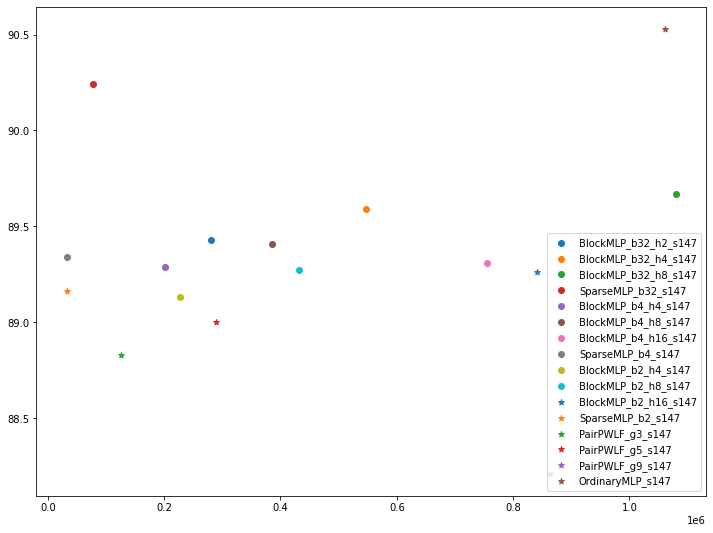

In [12]:
plt.figure(figsize=(12, 9))
for i, (model_name, stat) in enumerate(bench_dict.items()):
    start = 0
    stop = 16
    if (i < start or i >= stop) : continue
#     if not ("BlockMLP" in model_name): continue
    if stat["test_acc"][-1] > 20: ## fmnist_PairPWLF_g9_s369
        if i//10 == 0:
            marker='o'
        elif i//10 == 1:
            marker='*'
        elif i//10 == 2:
            marker='+'
        else:
            marker = '_'
#         if i > 10:
#             marker='o'
#         else:
#             marker = '*'
            
        n_params = stat['num_param']
        acc = np.max(stat["test_acc"])
#         acc = np.max(stat["train_acc"])
        plt.scatter(n_params, acc, label=model_name[7:], marker=marker)
plt.legend()